<a href="https://colab.research.google.com/github/DoItSon/playdata/blob/main/%EB%94%A5%EB%9F%AC%EB%8B%9D/05_%ED%85%8D%EC%8A%A4%ED%8A%B8_%EC%B2%98%EB%A6%AC_%EB%B0%8F_%EC%9E%84%EB%B2%A0%EB%94%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- 꿀팁: 배치사이즈를 4의배수로 주고 dimsize >128보다 커야한다.

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
DATA_PATH = "/content/drive/MyDrive/data/"
SEED = 42

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv(f"{DATA_PATH}imdb.csv")
df # 순차적 데이터 수치화하기!

,review,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1
...,...,...
743,I just got bored watching Jessice Lange take h...,0
744,"Unfortunately, any virtue in this film's produ...",0
745,"In a word, it is embarrassing.",0
746,Exceptionally bad!,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     748 non-null    object
 1   sentiment  748 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.8+ KB


In [ ]:
df["sentiment"].mean() # 1에 대한 비율

0.516042780748663

# 자연어 처리(Natual Language Processing)
- 자연어 이해
    - 읽기에 해당
    - 뉴스 기사를 읽어 카테고리 분류
- 자연어 생성
    - 쓰기,말하기에 해당
    - 날씨 관련 정보(강수량, 날씨 등)를 통해 오늘 날씨를 알려줌
    - text to text

# 단어문서행렬(Term Document Matrix)
- 문서별로 단어의 빈도를 정리한 표
- 백화점 데이터에 썻으면 성능이 좋았을 것이다 (범주형을 붙여 처리)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cnt_vec = CountVectorizer(max_features=100,stop_words="english") # 전체 문서의 단어의 상위 빈도수 100개 / the 나 an을 count 안함

tdm = cnt_vec.fit_transform(df["review"])
tdm

<748x100 sparse matrix of type '<class 'numpy.int64'>'
	with 1775 stored elements in Compressed Sparse Row format>

In [ ]:
tdm.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
cnt_vec.get_feature_names_out() # tdm의 각 열에 빈도수 100개 알파벳순

array(['10', 'acting', 'actor', 'actors', 'actually', 'art', 'awful',
       'bad', 'beautiful', 'best', 'better', 'big', 'black', 'boring',
       'camera', 'cast', 'character', 'characters', 'cinematography',
       'definitely', 'dialogue', 'did', 'didn', 'director', 'doesn',
       'don', 'drama', 'effects', 'end', 'ending', 'excellent', 'feeling',
       'film', 'films', 'funny', 'game', 'going', 'good', 'great',
       'highly', 'interesting', 'job', 'just', 'know', 'life', 'like',
       'liked', 'line', 'little', 'look', 'love', 'loved', 'make', 'man',
       'movie', 'movies', 'music', 'people', 'performance', 'piece',
       'played', 'plot', 'predictable', 'pretty', 'quite', 'real',
       'really', 'recommend', 'right', 'saw', 'say', 'scene', 'scenes',
       'screen', 'script', 'seen', 'short', 'simply', 'story', 'stupid',
       'terrible', 'thing', 'things', 'think', 'thought', 'time',
       'totally', 'truly', 've', 'waste', 'watch', 'watching', 'way',
       'wonderfu

In [ ]:
tdm_df = pd.DataFrame(tdm.toarray(),columns=cnt_vec.get_feature_names_out())
tdm_df

,10,acting,actor,actors,actually,art,awful,bad,beautiful,best,...,watch,watching,way,wonderful,work,worse,worst,worth,writing,years
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
743,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
744,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
746,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
tdm_df.sum().to_dict() # 단어의 빈도수의 총합 (시각화하기 위해 딕셔너리 형태로 변환)

{'10': 29,
 'acting': 43,
 'actor': 10,
 'actors': 19,
 'actually': 10,
 'art': 13,
 'awful': 14,
 'bad': 71,
 'beautiful': 11,
 'best': 25,
 'better': 18,
 'big': 10,
 'black': 10,
 'boring': 10,
 'camera': 10,
 'cast': 18,
 'character': 24,
 'characters': 35,
 'cinematography': 10,
 'definitely': 9,
 'dialogue': 13,
 'did': 11,
 'didn': 22,
 'director': 12,
 'doesn': 12,
 'don': 26,
 'drama': 10,
 'effects': 9,
 'end': 11,
 'ending': 11,
 'excellent': 16,
 'feeling': 10,
 'film': 163,
 'films': 24,
 'funny': 19,
 'game': 9,
 'going': 10,
 'good': 58,
 'great': 41,
 'highly': 10,
 'interesting': 12,
 'job': 9,
 'just': 63,
 'know': 14,
 'life': 12,
 'like': 48,
 'liked': 10,
 'line': 12,
 'little': 17,
 'look': 19,
 'love': 22,
 'loved': 10,
 'make': 22,
 'man': 13,
 'movie': 182,
 'movies': 29,
 'music': 14,
 'people': 14,
 'performance': 12,
 'piece': 10,
 'played': 10,
 'plot': 28,
 'predictable': 10,
 'pretty': 13,
 'quite': 10,
 'real': 21,
 'really': 41,
 'recommend': 13,
 'righ

# 단어구름 만들어 시각화해보기

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(background_color="white",width=500,height=500)

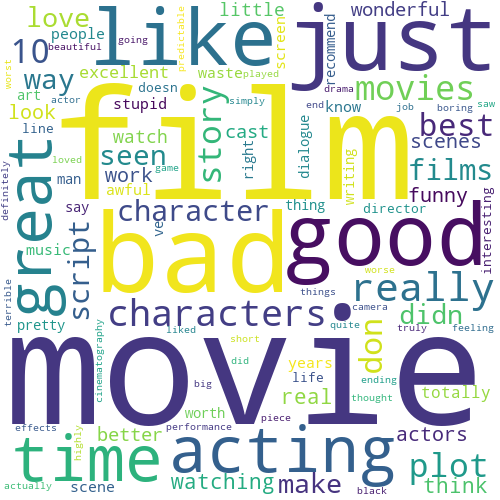

In [ ]:
cloud = wc.generate_from_frequencies(tdm_df.sum().to_dict())
cloud.to_image()

# TF-IDF
- 단어 빈도(TF)와 역문서빈도(IDF)를 곱한값
- 단어의 빈도에 가중치를 주는 방법
- 문서빈도(DF) : 각 단어가 등장한 문서의 수
- 역문서빈도(IDF) : 총 문서를 DF로 나눈 값 (분모가 커질수록 IDF 작아진다.)
- IDF가 높아질수록 좋은 단어이다.
- 어순을 전혀 고려하지않는다는 단점이 있다.(RNN에 넣어준다.)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vec = TfidfVectorizer(max_features=100, stop_words="english")
tfidf = tfidf_vec.fit_transform(df["review"])
tfidf

<748x100 sparse matrix of type '<class 'numpy.float64'>'
	with 1775 stored elements in Compressed Sparse Row format>

In [ ]:
pd.DataFrame(tfidf.toarray(),columns = tfidf_vec.get_feature_names_out())

,10,acting,actor,actors,actually,art,awful,bad,beautiful,best,...,watch,watching,way,wonderful,work,worse,worst,worth,writing,years
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.402595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.618573,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
743,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.785154,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
744,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.652005,0.0,0.0,0.0,0.0,0.0
745,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
746,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


# 토큰화(tokenization)
- 자연어 처리를 위해 문장을 처리하기 위한 단위인 토큰으로 분리하는 것
- ex)  [나는, 밥을, 먹었다.]

In [ ]:
from torchtext.data.utils import get_tokenizer
tokenizer = get_tokenizer("basic_english")
# get_tokenizer(lambda x : x.split()) call back 함수 적용예시

In [ ]:
tokenizer("i love you")

['i', 'love', 'you']

- 어휘집 만들기
    - 인공적인 테스크를 만날 때 이렇게 분리해야한다.
- 의미있는 단어를 정수형으로 변환하는 단어집을 만듦

In [ ]:
from torchtext.vocab import build_vocab_from_iterator

In [ ]:
def yield_tokens(data,tokenizer):
    for text in data:
        yield tokenizer(text)

- padding
    - 문자열의 길이를 맞추기 위해 채워주는 것(대부분 0으로 채움)
- OOV(Out-Of_vocabulary)
    - 단어 사전에 없는 단어가 나올 때 처리하는 것 (1로 처리하여 에러를 방지)


In [ ]:
gen = yield_tokens(df["review"],tokenizer)
vocab = build_vocab_from_iterator(gen,specials=["<pad>","<unk>"]) # 0, 1으로 숫자를 지정 ["<unk>","<pad>"]로 하면 unk가 0이 된다.
vocab.set_default_index(vocab["<unk>"]) # 새로운 단어가 들어오면 1로 바꿈

In [ ]:
vocab["<unk>"] # 사전화가 잘됨

1

In [ ]:
len(vocab) # 단어 개수 확인

3146

In [ ]:
vocab(["a","very","karns"]) # 정수인코딩

[6, 34, 1]

In [ ]:
vocab.lookup_tokens([6,34,1,0]) # 디코딩

['a', 'very', '<unk>', '<pad>']

- 학습 및 정답 데이터 만들기

In [ ]:
train = [ vocab(tokenizer(text)) for text in df["review"].tolist()]
target = df.sentiment.to_numpy()
len(train),target.shape # 정답값은 2차원이어야 한다.

(748, (748,))

In [ ]:
import torch
import numpy as np
import pandas as pd
from tqdm.auto import tqdm
import random # 시드 고정을 위해
import os

device = 'cuda' if torch.cuda.is_available() else 'cpu'

def reset_seeds(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed) # 파이썬 환경변수 시드 고정
    np.random.seed(seed)
    torch.manual_seed(seed) # cpu 연산 무작위 고정
    torch.cuda.manual_seed(seed) # gpu 연산 무작위 고정
    torch.backends.cudnn.deterministic = True

In [ ]:
class ReviewDataset(torch.utils.data.Dataset):
    def __init__(self,x,y=None):
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.x)
    
    def __getitem__(self,idx):
        item = {}
        item["x"] = self.x[idx] # Tensor로 추후 전환 (리스트 값)
        if self.y is not None:
            item["y"] = self.y[idx] # (스칼라 값)

        return item

In [ ]:
dt = ReviewDataset(train,target)
[dt[0],dt[1]]

[{'x': [6,
   34,
   4,
   34,
   4,
   34,
   2741,
   4,
   1263,
   16,
   44,
   6,
   1688,
   4,
   1709,
   524,
   155,
   2],
  'y': 0},
 {'x': [32,
   696,
   62,
   15,
   71,
   462,
   70,
   3,
   896,
   66,
   58,
   3,
   345,
   4,
   2338,
   312,
   7,
   1187,
   1174,
   52,
   2],
  'y': 0}]

- collate_fn

In [ ]:
def collate_fn(samples):
    x = [ torch.LongTensor(sample["x"]) for sample in samples ] # 길이가 다른 Tensor
    y = [ sample["y"] for sample in samples]
    y = torch.Tensor(y).view(-1,1)
    x = torch.nn.utils.rnn.pad_sequence(x,batch_first=True) # 문자 길이에 맞춰서 채워준다.(seq를 먼저하기 때문에 batch_first = True를 넣어주어야 한다.)
    return {"x":x,"y":y}

In [ ]:
dl = torch.utils.data.DataLoader(dt, shuffle=False,  batch_size = 8, collate_fn = collate_fn) # 콜백함수로 넣어준 것!

In [ ]:
batch = next(iter(dl))
batch

{'x': tensor([[   6,   34,    4,   34,    4,   34, 2741,    4, 1263,   16,   44,    6,
          1688,    4, 1709,  524,  155,    2,    0,    0,    0,    0,    0,    0,
             0,    0,    0,    0,    0,    0,    0,    0,    0],
         [  32,  696,   62,   15,   71,  462,   70,    3,  896,   66,   58,    3,
           345,    4, 2338,  312,    7, 1187, 1174,   52,    2,    0,    0,    0,
             0,    0,    0,    0,    0,    0,    0,    0,    0],
         [1319, 1306,   26,  198,  216,  264,    5,  352,  244,  753,    4,    3,
            16,  304,   70,  769,   59,   71,  387,   70,   24,    3,   54,   15,
           329,    5,    3,   80,    5,  280,  218, 2357,    2],
         [  34,  125,  144,   58,  241,   13,  690,    7,    2,    0,    0,    0,
             0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
             0,    0,    0,    0,    0,    0,    0,    0,    0],
         [   3,   85,  147,   14,    3,   16,   15,   77, 1934,    8,  513,   1

# 단어 임베딩(embedding)
- 단어를 실수 형태의 벡터로 표현하는 것
- 신경망에서 임베딩 레이어를 추가하여 단어에 임베딩을 얻을 수 있다.

- num_embedding
    - 임베딩을 할 단어들의 개수
- embedding_dim
    - 단어마다 임베딩할 벡터의 차원

In [ ]:
len(vocab) # num_embedding

3146

In [ ]:
emb_layer = torch.nn.Embedding(len(vocab),4) # 4개의 차원으로 끝냄
x = emb_layer(batch["x"])
x.shape # 8개의 행, 입력 길이 33 , 4개로 벡터화

torch.Size([8, 33, 4])

In [ ]:
x.shape

torch.Size([8, 33, 4])

In [ ]:
emb_layer.weight # 첫 행이 0번째 단어의 가중치 ... 마지막 행 마지막번째 단어의 가중치

Parameter containing:
tensor([[-1.6706, -0.2612, -1.1807,  0.8877],
        [ 0.5098, -1.2550,  2.0425, -0.7948],
        [ 0.7640,  1.1433, -0.2550, -0.1863],
        ...,
        [ 1.0190,  0.5023, -0.9042, -0.2253],
        [-1.1447, -1.1877,  1.2519,  0.4817],
        [-1.1178,  0.4301, -1.8247,  1.0537]], requires_grad=True)

In [ ]:
# 임베딩 레이어를 통과시킨다.
# rnn 레이어를 통과시킨다. 
# torch info는 안된다. => 임베딩 레이어가 들어가면 안된다.

In [ ]:
type(train) # 리스트는 멀티 인덱싱이 안된다. 그래서 넘파이로 변경

list

In [ ]:
train = np.array(train,dtype="object")

- 모델 생성

In [ ]:
class RNNModel(torch.nn.Module):
    def __init__(self,vocab_size,embedding_dim):
        super().__init__()
        self.emb_layer = torch.nn.Embedding(vocab_size,embedding_dim)
        self.gru_layer = torch.nn.GRU(embedding_dim,embedding_dim//2,batch_first=True)
        self.relu = torch.nn.ReLU()
        self.output_layer = torch.nn.Linear(embedding_dim//2,1)

    def forward(self,x):
        x = self.emb_layer(x)
        _, x = self.gru_layer(x)
        x = x.squeeze(dim=0) # dim = 0 을 넣어야 K-Fold 값을 늘릴 수 있다.
        x = self.relu(x)
        x = self.output_layer(x)


        return x

In [ ]:
model = RNNModel(len(vocab),32)
model(batch["x"])

tensor([[-0.1402],
        [-0.1364],
        [-0.1462],
        [-0.1022],
        [-0.1560],
        [-0.2170],
        [-0.0987],
        [-0.1408]], grad_fn=<AddmmBackward0>)

- 모델 학습

In [ ]:
train.shape

(748,)

In [ ]:
batch_size = 32 # 미니 배치 사이즈
loss_fn = torch.nn.BCEWithLogitsLoss() # 손실함수 객체 생성
optimizer = torch.optim.Adam(model.parameters(),lr=0.001) # optimizer 객체 생성
train_dt = ReviewDataset(train,target) # 학습데이터 객체 생성
train_dl = torch.utils.data.DataLoader(train_dt,batch_size=batch_size,shuffle=True,collate_fn=collate_fn)

In [ ]:
def train_loop(train_dl,model,loss_fn,optimizer,device):
    model.train()

    epoch_loss = 0
    for batch in train_dl:
        pred = model(batch["x"].to(device))
        loss = loss_fn(pred,batch["y"].to(device))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
    epoch_loss /= len(train_dl)
    
    return epoch_loss

In [ ]:
train_loop(train_dl,model,loss_fn,optimizer,device)

0.6960312376419703

In [ ]:
@torch.no_grad()
def test_loop(dataloader,model,loss_fn,device):
    epoch_loss = 0
    model.eval() # 학습을 제외하고 학습을 할 때 사용

    pred_list = []
    sig = torch.nn.Sigmoid()
    
    for batch in dataloader:
        pred = model(batch["x"].to(device))

        if batch.get("y") is not None:
            loss = loss_fn(pred,batch["y"].to(device))
            epoch_loss += loss.item()

        pred = sig(pred)
        pred = pred.to("cpu").numpy()
        pred_list.append(pred)

    epoch_loss /= len(dataloader)

    pred = np.concatenate(pred_list)
    
    return epoch_loss,pred

In [ ]:
from sklearn.model_selection import KFold
cv = KFold(n_splits = 5, shuffle = True, random_state = SEED)

In [ ]:
num_features = len(vocab)
epoch = 500

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
is_holdout = False

best_score_list = []
reset_seeds(SEED)

for i, (tri,val) in enumerate(cv.split(train)):

    # 학습 데이터
    x_train = train[tri]
    y_train = target[tri]

    # 검증 데이터
    x_valid = train[val]
    y_valid = target[val]

    model = RNNModel(len(vocab),32).to(device)
    optimizer = torch.optim.Adam(model.parameters())

    train_dt = ReviewDataset(x_train,y_train)
    valid_dt = ReviewDataset(x_valid,y_valid)

    train_dl = torch.utils.data.DataLoader(train_dt,batch_size=batch_size,shuffle=True,collate_fn=collate_fn)
    valid_dl = torch.utils.data.DataLoader(valid_dt,batch_size=batch_size,shuffle=False,collate_fn=collate_fn)

    best_score = 0
    patience = 0

    for e in tqdm(range(epoch)):
        
        train_loss = train_loop(train_dl, model, loss_fn, optimizer, device)
        valid_loss,pred = test_loop(valid_dl, model, loss_fn, device)
        pred = (pred>0.5).astype(int) # [ 1 if i > 0.5 else 0 for i in pred ]
        score = accuracy_score(y_valid,pred) # 현재 에폭에 검증셋에 대한 AUC
        patience += 1

        if best_score < score:
            patience += 1 # 최고점수 갱신 했으니 초기화
            best_score = score
            torch.save(model.state_dict(),f"model_{i}.pth") # 최고점수가 갱신되면 덮어씌운다.

        if patience == 5: # 5인 경우 멈춰라!
            break

    print(f"{i} 번째 폴드 ACC: {best_score}") # 폴드별 AUC 스코어라 점수가 다르다.
    best_score_list.append(best_score)

    if is_holdout:
        break

  0%|          | 0/500 [00:00<?, ?it/s]

0 번째 폴드 ACC: 0.5


  0%|          | 0/500 [00:00<?, ?it/s]

1 번째 폴드 ACC: 0.49333333333333335


  0%|          | 0/500 [00:00<?, ?it/s]

2 번째 폴드 ACC: 0.72


  0%|          | 0/500 [00:00<?, ?it/s]

3 번째 폴드 ACC: 0.5033557046979866


  0%|          | 0/500 [00:00<?, ?it/s]

4 번째 폴드 ACC: 0.5704697986577181
